In [1]:
import numpy as np
import pandas as pd

# Load embeddings for 'prom'
embeddings_prom = pd.read_csv('./saved_lists/verification_embeddings_id_prom.csv')
embeddings_prom['embedding1'] = embeddings_prom['embedding1'].apply(eval)
embeddings_prom['embedding2'] = embeddings_prom['embedding2'].apply(eval)

# Load embeddings for 'sub'
embeddings_sub = pd.read_csv('./saved_lists/verification_embeddings_id_sub.csv')
embeddings_sub['embedding1'] = embeddings_sub['embedding1'].apply(eval)
embeddings_sub['embedding2'] = embeddings_sub['embedding2'].apply(eval)

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarities for 'prom'
cosine_similarities_prom = []
for index, row in embeddings_prom.iterrows():
    embedding1 = np.array(row['embedding1'])
    embedding2 = np.array(row['embedding2'])
    cosine_sim = cosine_similarity([embedding1], [embedding2])[0][0]
    cosine_similarities_prom.append(cosine_sim)

# Calculate cosine similarities for 'sub'
cosine_similarities_sub = []
for index, row in embeddings_sub.iterrows():
    embedding1 = np.array(row['embedding1'])
    embedding2 = np.array(row['embedding2'])
    cosine_sim = cosine_similarity([embedding1], [embedding2])[0][0]
    cosine_similarities_sub.append(cosine_sim)

In [3]:
# Convert list to numpy array
cosine_similarities_prom = np.array(cosine_similarities_prom)
cosine_similarities_sub = np.array(cosine_similarities_sub)

In [4]:
from sklearn.metrics import roc_curve, auc

# Get the true labels for 'prom'
labels_prom = embeddings_prom['label'].values
# Get the true labels for 'sub'
labels_sub = embeddings_sub['label'].values

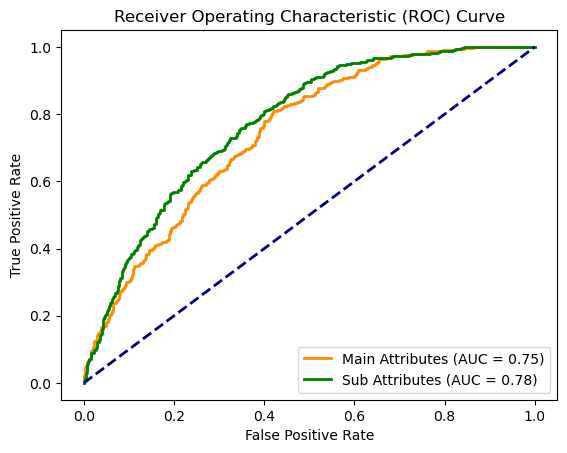

In [5]:
import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure()

# Plot ROC curve for 'prom'
fpr_prom, tpr_prom, thresholds_prom = roc_curve(labels_prom, cosine_similarities_prom)
roc_auc_prom = auc(fpr_prom, tpr_prom)
plt.plot(fpr_prom, tpr_prom, color='darkorange', lw=2, label='Main Attributes (AUC = %0.2f)' % roc_auc_prom)

# Plot ROC curve for 'sub'
fpr_sub, tpr_sub, thresholds_sub = roc_curve(labels_sub, cosine_similarities_sub)
roc_auc_sub = auc(fpr_sub, tpr_sub)
plt.plot(fpr_sub, tpr_sub, color='green', lw=2, label='Sub Attributes (AUC = %0.2f)' % roc_auc_sub)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [6]:
print(np.argmax(tpr_sub-fpr_sub))

270


In [7]:
thresholds_sub[270]

0.9476160416597894

In [8]:
predictions = np.where(cosine_similarities_sub > thresholds_sub[np.argmax(tpr_sub-fpr_sub)], 1, 0)

In [9]:
len(predictions)

1200

In [10]:
df = pd.read_csv('./saved_lists/verification_pairs_id.csv')

In [13]:
incdict = {}
incorrect = 0
match_incorrect = 0
match_correct = 0

for row in df.iterrows():
    if row[1]['label'] != predictions[row[0]]:
        incorrect += 1
        if row[1]['label'] == 1:
            match_incorrect += 1

        if row[1]['ver_image_path'] in incdict:
            incdict[row[1]['ver_image_path']] += 1
        else:
            incdict[row[1]['ver_image_path']] = 1
        if row[1]['car_image_path'] in incdict:
            incdict[row[1]['car_image_path']] += 1
        else:
            incdict[row[1]['car_image_path']] = 1
    else:
        if row[1]['label'] == 1:
            match_correct += 1

print(1200-incorrect, incorrect)
print(match_correct, 1200-incorrect-match_correct)
print(match_incorrect, incorrect-match_incorrect)

845 355
453 392
147 208


In [50]:
dict(sorted(incdict.items(), key=lambda item: item[1], reverse=True))

{'./ourcar/alexandria_ocasio-cortez_caricature/06.jpg': 17,
 './ourcar/denzel_washington_caricature/09.jpg': 16,
 './ourcar/xi_jinping_caricature/01.jpg': 14,
 './ourcar/mao_caricature/07.jpg': 12,
 './ourcar/melania_trump_caricature/17.jpg': 12,
 './ourcar/yao_ming_caricature/09.jpg': 10,
 './ourcar/bill_clinton_caricature/10.jpg': 8,
 './ourcar/bill_clinton_caricature/04.jpg': 8,
 './ourcar/ben_affleck_caricature/03.jpg': 8,
 './ourcar/mao_caricature/03.jpg': 8,
 './ourcar/denzel_washington_caricature/03.jpg': 7,
 './ourcar/alfred_hitchcock_caricature/13.jpg': 7,
 './ourcar/dr._phil_caricature/05.jpg': 7,
 './ourcar/ben_affleck_caricature/21.jpg': 7,
 './ourcar/fergie_caricature/07.jpg': 7,
 './ourcar/neil_patrick_harris_caricature/06.jpg': 7,
 './ourcar/benedict_cumberbatch_caricature/07.jpg': 7,
 './ourcar/sarah_palin_caricature/20.jpg': 7,
 './ourcar/nancy_pelosi_caricature/03.jpg': 7,
 './ourcar/rainn_wilson/07.jpg': 7,
 './ourcar/melania_trump_caricature/10.jpg': 6,
 './ourcar/d